In [ ]:
!pip install qiskit pylatexenc qiskit_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("dataset.csv")
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [ ]:
df.sample(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
22   8511133         M       15.340         14.26          102.50      704.4   
264   889719         M       17.190         22.07          111.60      928.3   
212  8810703         M       28.110         18.47          188.50     2499.0   
398   904302         B       11.060         14.83           70.31      378.2   
332   897132         B       11.220         19.86           71.94      387.3   
548   923169         B        9.683         19.34           61.05      285.7   
249   884689         B       11.520         14.93           73.87      406.3   
206   879804         B        9.876         17.27           62.92      295.4   
204    87930         B       12.470         18.60           81.09      481.9   
504   915186         B        9.268         12.87           61.49      248.7   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
22           0.10730           0.21350        0.207700             0.097560   
264          0.09726           0.08995        0.090610             0.065270   
212          0.11420           0.15160        0.320100             0.159500   
398          0.07741           0.04768        0.027120             0.007246   
332          0.10540           0.06779        0.005006             0.007583   
548          0.08491           0.05030        0.023370             0.009615   
249          0.10130           0.07808        0.043280             0.029290   
206          0.10890           0.07232        0.017560             0.019520   
204          0.09965           0.10580        0.080050             0.038210   
504          0.16340           0.22390        0.097300             0.052520   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
22   ...          19.08           125.10       980.9            0.1390   
264  ...          29.33           140.50      1436.0            0.1558   
212  ...          18.47           188.50      2499.0            0.1142   
398  ...          20.35            80.79       496.7            0.1120   
332  ...          25.78            76.91       436.1            0.1424   
548  ...          25.59            69.10       364.2            0.1199   
249  ...          21.19            80.88       491.8            0.1389   
206  ...          23.22            67.08       331.6            0.1415   
204  ...          24.64            96.05       677.9            0.1426   
504  ...          16.38            69.05       300.2            0.1902   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
22             0.59540          0.63050               0.23930          0.4667   
264            0.25670          0.38890               0.19840          0.3216   
212            0.15160          0.32010               0.15950          0.1648   
398            0.18790          0.20790               0.05556          0.2590   
332            0.09669          0.01335               0.02022          0.3292   
548            0.09546          0.09350               0.03846          0.2552   
249            0.15820          0.18040               0.09608          0.2664   
206            0.12470          0.06213               0.05588          0.2989   
204            0.23780          0.26710               0.10150          0.3014   
504            0.34410          0.20990               0.10250          0.3038   

     fractal_dimension_worst  Unnamed: 32  
22                   0.09946          NaN  
264                  0.07570          NaN  
212                  0.05525          NaN  
398                  0.09158          NaN  
332                  0.06522          NaN  
548                  0.07920          NaN  
249                  0.07809          NaN  
206                  0.07380          NaN  
204                  0.08750          NaN  
504                  0.12520          NaN  

[10 rows x 33 columns]

In [ ]:
df.shape

(569, 33)

In [ ]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [ ]:
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [ ]:
print(df['diagnosis'].unique())
print(df['diagnosis'].value_counts())

['M' 'B']
B    357
M    212
Name: diagnosis, dtype: int64


In [ ]:
df['diagnosis'] = df['diagnosis'].replace(['B', 'M'], [0, 1])
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [ ]:
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [ ]:
dia_col = df.pop('diagnosis')
df.insert(30, 'diagnosis', dia_col)

In [ ]:
df.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  diagnosis  
0          0.4601                  0.11890          1  
1          0.2750                  0.08902          1  
2          0.3613                  0.08758          1  
3          0.6638                  0.17300          1  
4          0.2364                  0.07678          1  

[5 rows x 31 columns]

In [ ]:
df = df.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se','compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se','fractal_dimension_se', 'radius_worst', 'texture_worst',
                        'perimeter_worst', 'area_worst', 'smoothness_worst',
                        'compactness_worst', 'concavity_worst', 'concave points_worst',
                        'symmetry_worst', 'fractal_dimension_worst'], axis=1)

In [ ]:
df.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  diagnosis  
0                 0.07871          1  
1                 0.05667          1  
2                 0.05999          1  
3                 0.09744          1  
4                 0.05883          1

In [ ]:
df.shape

(569, 11)

Negative (0):  357
Positive (1):  212


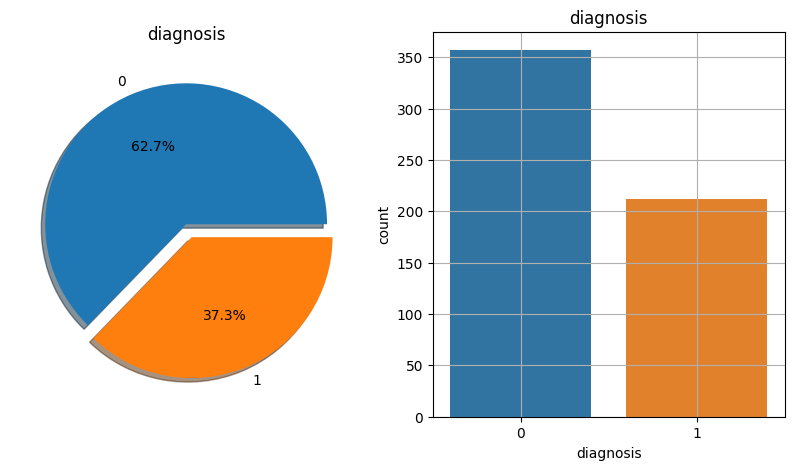

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))

df['diagnosis'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True
)
ax[0].set_title('diagnosis')
ax[0].set_ylabel('')


sns.countplot(x='diagnosis', data=df, ax=ax[1])
ax[1].set_title('diagnosis')
N, P = df['diagnosis'].value_counts()
print('Negative (0): ', N)
print('Positive (1): ', P)
plt.grid()
plt.show()

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>],
       [<Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'compactness_mean'}>],
       [<Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>],
       [<Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'diagnosis'}>, <Axes: >]], dtype=object)

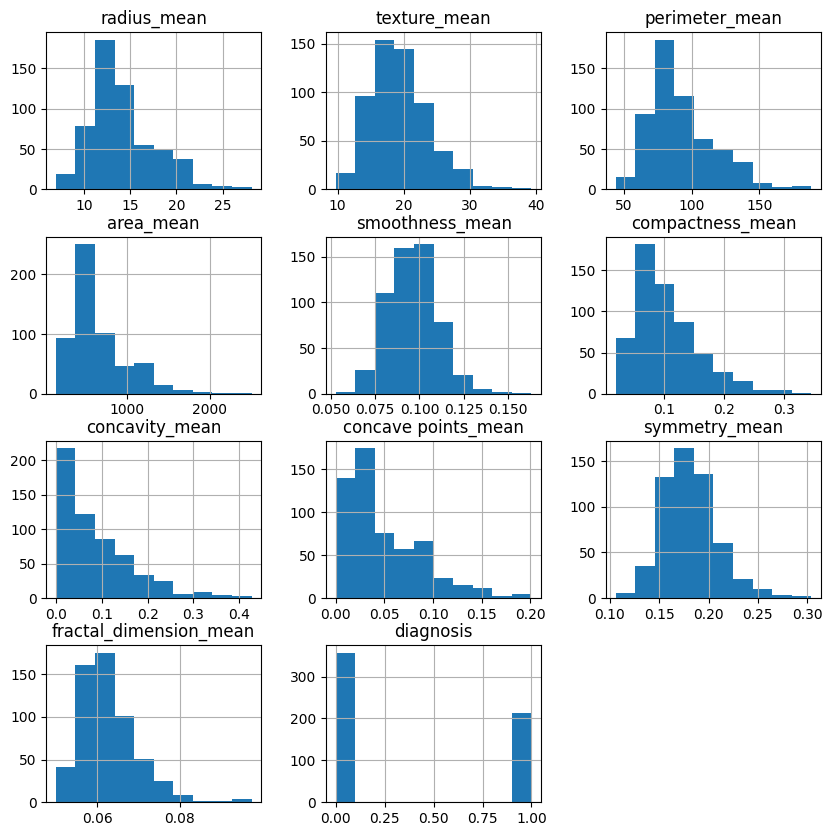

In [ ]:
df.hist(bins=10, figsize=(10, 10))

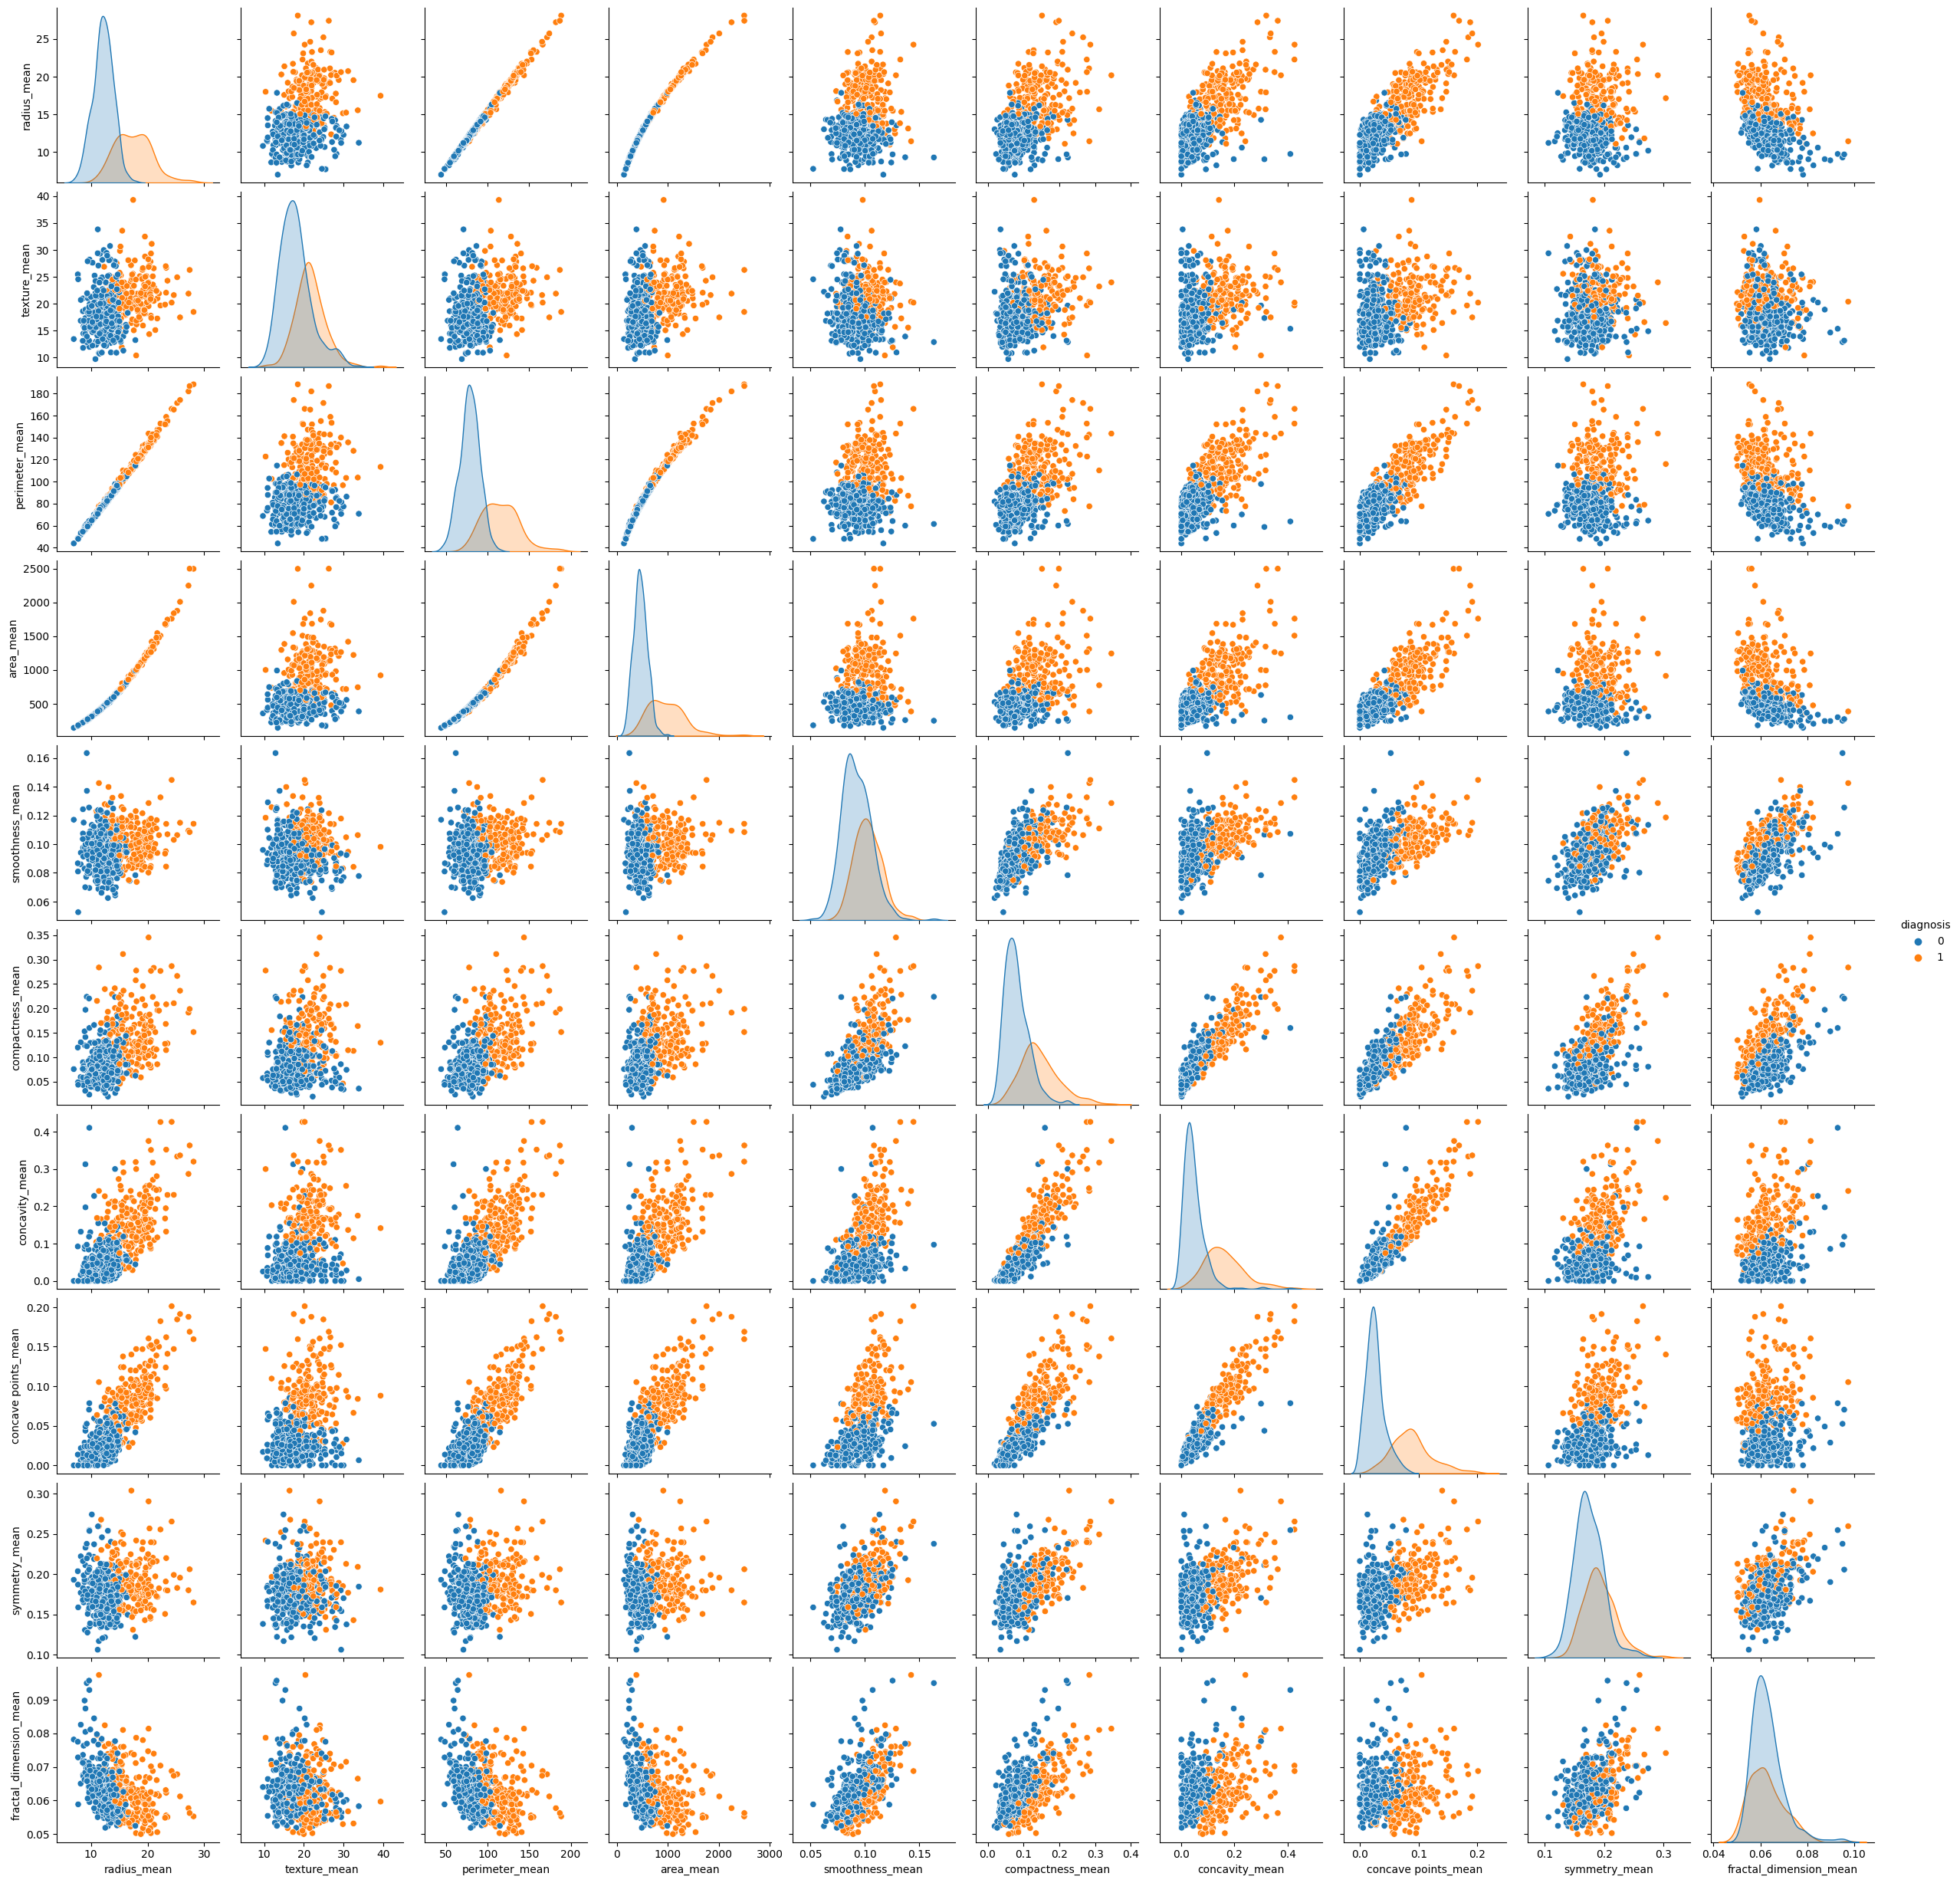

In [ ]:
sns.pairplot(df, hue='diagnosis')

In [ ]:
required_col = 'diagnosis' 
labels = df[required_col]
features = df.drop(required_col, axis=1)

In [ ]:
features

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     fractal_dimension_mean  
0                   0.07871  
1                   0.05667  
2                   0.05999  
3                   0.09744  
4                   0.05883  
..                      ...  
564                 0.05623  
565                 0.05533  
566                 0.05648  
567                 0.07016  
568                 0.05884  

[569 rows x 10 columns]

In [ ]:
labels

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler().fit_transform(features)
features

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.73111332, 0.68636364,
        0.60551811],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.34875746, 0.37979798,
        0.14132266],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.63568588, 0.50959596,
        0.21124684],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.26351889, 0.26767677,
        0.13732098],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.7554672 , 0.67525253,
        0.42544229],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.26616162,
        0.18702612]])

QUANTUM SUPPORT VECTOR MACHINE IMPLEMENTATION

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import mean_squared_error, f1_score
from qiskit import Aer, QuantumCircuit, execute

In [ ]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target


In [ ]:

# Normalize the feature vectors
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [ ]:
num_features = X.shape[1]
theta = 2 * np.arcsin(np.sqrt(num_features / X.shape[0]))
num_qubits = num_features + 1
qc = QuantumCircuit(num_qubits, num_qubits)

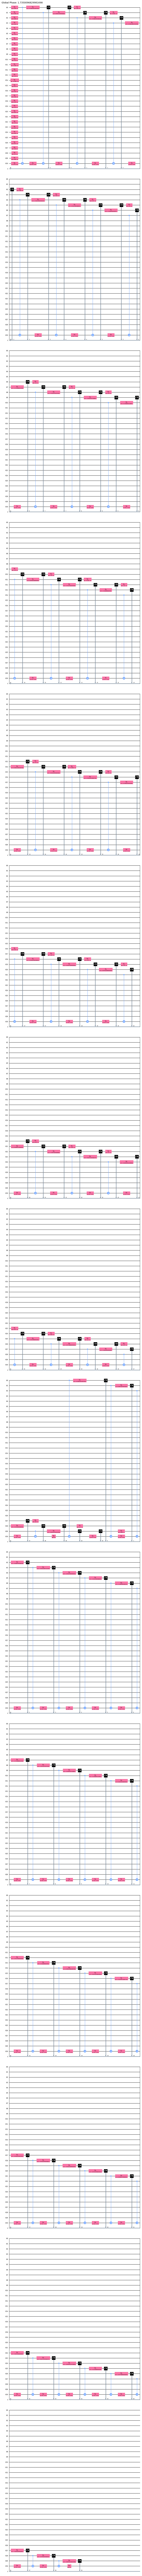

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from qiskit import Aer, QuantumCircuit, execute, transpile
from qiskit.visualization import circuit_drawer, plot_histogram

qc.h(range(num_features))
qc.x(num_features)
qc.h(num_features)

# Apply the feature map
for i in range(num_features):
    qc.rz(X[0][i] * theta, i)

# Apply the controlled-Z gates
for i in range(num_features):
    qc.cz(i, num_features)

# Apply the inverse feature map
for i in range(num_features):
    qc.rz(-X[0][i] * theta, i)

# Measure the qubits
qc.measure(range(num_features), range(num_features))

# Draw the circuit
# Draw the circuit with reduced image size
transpiled_qc = transpile(qc, basis_gates=['u3', 'cx'])
circuit_drawer(transpiled_qc, output='mpl', scale=0.5, plot_barriers=False)



In [ ]:

# Measure the qubits
qc.measure(range(num_features), range(num_features))

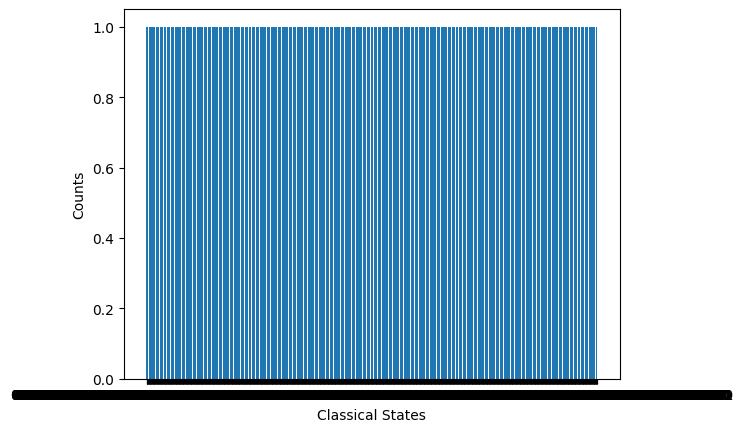

In [ ]:
# Train the QSVC
backend = Aer.get_backend('qasm_simulator')
shots = 1024
job = execute(qc, backend, shots=shots)
counts = job.result().get_counts()
#print(counts)

import matplotlib.pyplot as plt

plt.bar(counts.keys(), counts.values())
plt.xlabel('Classical States')
plt.ylabel('Counts')
plt.show()

In [ ]:
result = job.result()
counts = result.get_counts(qc)
coeff = 10
svm_weights = np.zeros(num_features)
svm_intercept = 10.0
for output in counts:
    binary_output = [int(bit) for bit in output][::-1]
    predicted_label = sum(binary_output[i] * 2 ** i for i in range(num_features))
    svm_weights += counts[output] * np.array([(-1) ** (predicted_label >> i & 1) for i in range(num_features)])
    svm_intercept += counts[output] * (-1) ** (predicted_label >> num_features)

svm_weights /= shots
svm_intercept /= shots

In [ ]:
y_pred_qsvc = np.sign(np.dot(X, svm_weights) + svm_intercept)
accuracy_qsvc = np.mean(y_pred_qsvc == y)
f1_score_qsvc = f1_score(y, y_pred_qsvc)

print("Quantum SVC accuracy:", accuracy_qsvc * 100)
print("Quantum SVC F1 score:", f1_score_qsvc*100)


Quantum SVC accuracy: 62.741652021089635
Quantum SVC F1 score: 77.10583153347731


In [ ]:
from sklearn.svm import SVC

# Create and train the classical SVC model
svc_model = SVC()
svc_model.fit(X, y)

# Evaluate the Classical SVC predictions
y_pred_svc = svc_model.predict(X)
accuracy_svc = np.mean(y_pred_svc == y)
rmse_svc = np.sqrt(mean_squared_error(y, y_pred_svc))
f1_score_svc = f1_score(y, y_pred_svc)

print("Classical SVC accuracy:", accuracy_svc * 100)
print("Classical SVC F1 score:", f1_score_svc*100)


Classical SVC accuracy: 98.76977152899823
Classical SVC F1 score: 99.02912621359222


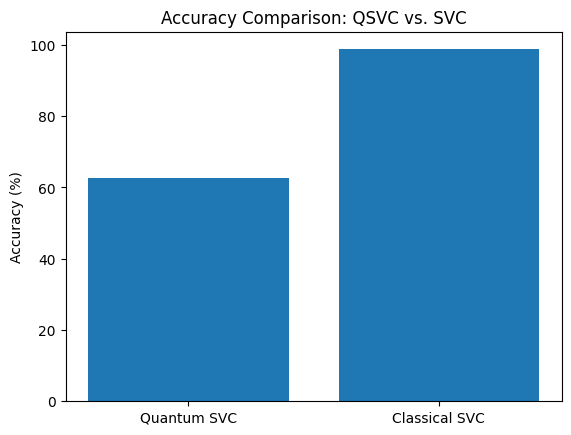

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values
qsvc_accuracy = accuracy_qsvc * 100  # Quantum SVC accuracy
svc_accuracy = accuracy_svc * 100  # Classical SVC accuracy

# Create a bar chart to compare accuracies
labels = ['Quantum SVC', 'Classical SVC']
accuracies = [qsvc_accuracy, svc_accuracy]

plt.bar(labels, accuracies)
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison: QSVC vs. SVC')
plt.show()


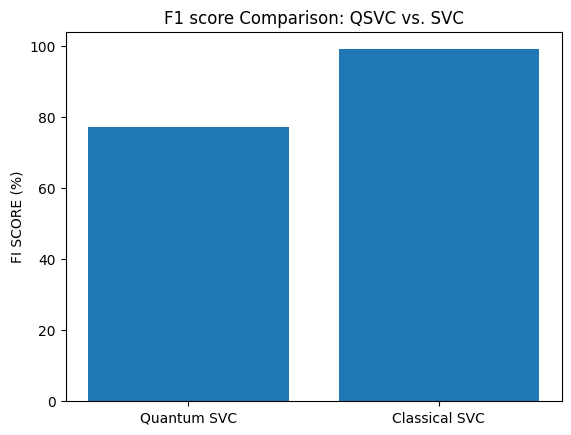

In [ ]:
import matplotlib.pyplot as plt

# Accuracy values
f1_qsvc_accuracy = f1_score_qsvc * 100  # Quantum SVC accuracy
f1_svc_accuracy = f1_score_svc * 100  # Classical SVC accuracy

# Create a bar chart to compare accuracies
labels = ['Quantum SVC', 'Classical SVC']
accuracies = [f1_qsvc_accuracy, f1_svc_accuracy]

plt.bar(labels, accuracies)
plt.ylabel('FI SCORE (%)')
plt.title('F1 score Comparison: QSVC vs. SVC')
plt.show()